Atividade (2.5): Treine uma MLP no conjunto de dados MNIST e veja se você consegue obter mais de 98% de precisão. Dica: faça a aquisição dos dados usando o Keras (keras.datasets.mnist.load_data()).

# Bibliotécas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


# Aquisição dos dados

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

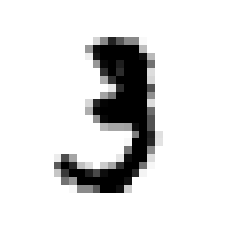

In [7]:
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

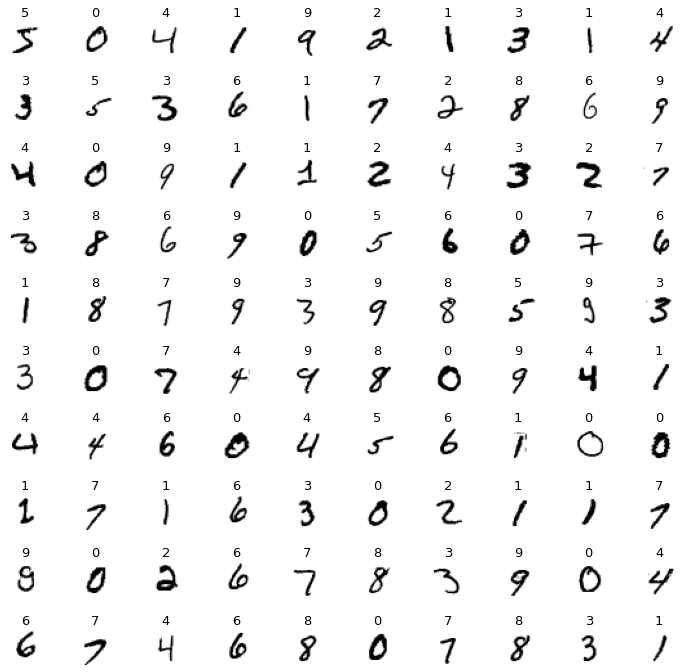

In [9]:
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=13)
plt.subplots_adjust(wspace=1.0, hspace=0.5)
plt.show()

# pré-processamento

In [10]:
# Criar um conj de validação de 5k e mudar a escala dos pixels de 0-255 para 0-1 (float)
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

# Contruindo Arquitetura

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [12]:
model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
hidden1 = model.layers[1]

In [15]:
weights, biases = hidden1.get_weights()

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

In [18]:
hidden2 = model.layers[2]

In [19]:
weights, biases = hidden2.get_weights()

In [20]:
weights.shape

(300, 100)

In [21]:
output = model.layers[3]

In [22]:
weights, biases = output.get_weights()

In [23]:
weights.shape

(100, 10)

In [24]:
biases.shape

(10,)

# Treinamento

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [176]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0089 - accuracy: 0.9993 - val_loss: 0.0937 - val_accuracy: 0.9756
Epoch 2/30
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0086 - accuracy: 0.9994 - val_loss: 0.0925 - val_accuracy: 0.9748
Epoch 3/30
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 0.0934 - val_accuracy: 0.9750
Epoch 4/30
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0079 - accuracy: 0.9995 - val_loss: 0.0924 - val_accuracy: 0.9744
Epoch 5/30
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0077 - accuracy: 0.9996 - val_loss: 0.0931 - val_accuracy: 0.9756
Epoch 6/30
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0074 - accuracy: 0.9996 - val_loss: 0.0933 - val_accuracy: 0.9756
Epoch 7/30
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0072 - accuracy: 0.9995 - val_loss: 0.0941 - val_accuracy:

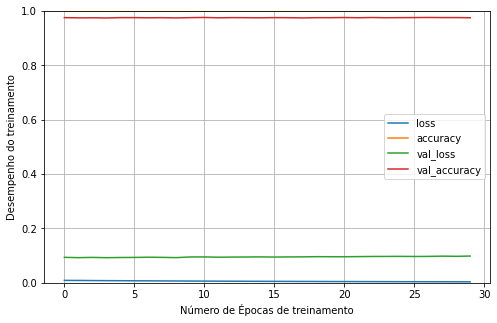

In [177]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [186]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1016 - val_accuracy: 0.9760
Epoch 2/15
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.9760
Epoch 3/15
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 0.9760
Epoch 4/15
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1016 - val_accuracy: 0.9758
Epoch 5/15
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.9770
Epoch 6/15
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9764
Epoch 7/15
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy:

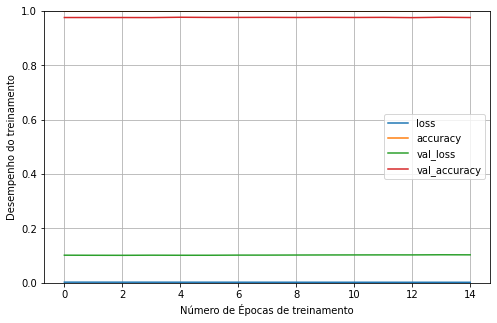

In [187]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [193]:
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1027 - val_accuracy: 0.9764
Epoch 2/60
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9766
Epoch 3/60
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9762
Epoch 4/60
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy: 0.9766
Epoch 5/60
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy: 0.9758
Epoch 6/60
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1034 - val_accuracy: 0.9762
Epoch 7/60
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy:

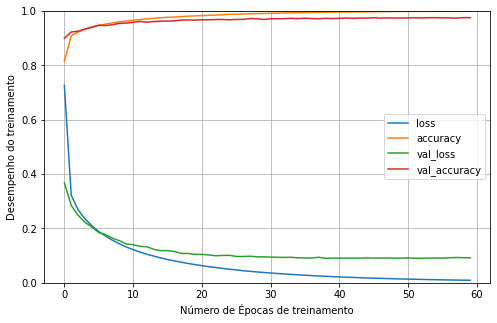

In [175]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
history = model.fit(X_train, y_train, epochs=120, validation_data=(X_valid, y_valid))

Epoch 1/120
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6227 - accuracy: 0.8364 - val_loss: 0.3055 - val_accuracy: 0.9176
Epoch 2/120
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2912 - accuracy: 0.9175 - val_loss: 0.2404 - val_accuracy: 0.9356
Epoch 3/120
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2370 - accuracy: 0.9326 - val_loss: 0.2041 - val_accuracy: 0.9422
Epoch 4/120
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2015 - accuracy: 0.9431 - val_loss: 0.1787 - val_accuracy: 0.9536
Epoch 5/120
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1756 - accuracy: 0.9509 - val_loss: 0.1549 - val_accuracy: 0.9576
Epoch 6/120
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1554 - accuracy: 0.9561 - val_loss: 0.1428 - val_accuracy: 0.9580
Epoch 7/120
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1392 - accuracy: 0.9613 - val_loss: 0.1299 - val_ac

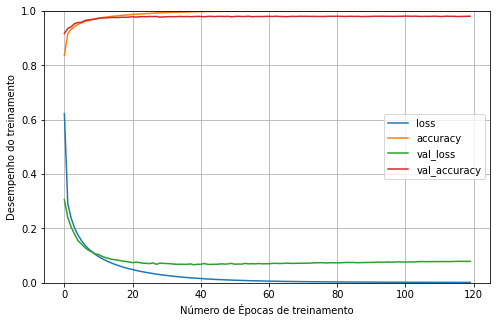

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 5. Testando o modelo

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 766us/step - loss: 0.0785 - accuracy: 0.9802


[0.07847607135772705, 0.9801999926567078]

In [31]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.62, 0.38, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],
      dtype=float32)

In [32]:
# Pega a posição do maior valor na linha
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [33]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
print('Acurácia: ', accuracy_score(y_test,y_pred))
print('Kappa: ', cohen_kappa_score(y_test,y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test,y_pred))

Acurácia:  0.9802
Kappa:  0.9779912539688689
Matriz de confusão: 
 [[ 969    0    1    0    1    2    2    1    3    1]
 [   0 1124    1    3    0    1    3    1    2    0]
 [   3    2 1010    4    1    0    1    5    6    0]
 [   0    0    4  995    0    4    0    1    4    2]
 [   0    0    3    1  965    1    3    1    0    8]
 [   2    1    0   10    0  865    4    1    5    4]
 [   3    2    3    1    3    4  942    0    0    0]
 [   0    3    5    2    2    0    0 1007    3    6]
 [   3    0    4    6    2    3    4    3  944    5]
 [   0    2    0    5    7    4    1    4    5  981]]


## 6. Salvando o modelo

In [35]:
model.save("modelo_mlp.h5")

In [36]:
model = keras.models.load_model("modelo_mlp.h5")

In [37]:
np.argmax(model.predict(X_test), axis=-1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
checkpoint = keras.callbacks.ModelCheckpoint("melhor_modelo_mlp.h5", save_best_only=True)

In [39]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0788 - val_accuracy: 0.9812
Epoch 2/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0788 - val_accuracy: 0.9808
Epoch 3/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0796 - val_accuracy: 0.9806
Epoch 4/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0795 - val_accuracy: 0.9804
Epoch 5/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9804
Epoch 6/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9808
Epoch 7/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy:

$Atividade (2.5):$ Treine uma MLP no conjunto de dados MNIST e veja se você consegue obter mais de 98% de precisão. Dica: faça a aquisição dos dados usando o Keras (keras.datasets.mnist.load_data()).